# Economic Data Analysis

In [4]:
!pip install fredapi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [9]:
plt.style.use("fivethirtyeight")
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

In [10]:
fred_key = "46c410752ad87539486c602c21895522"

### 1. Create the Fred Object

In [11]:
fred = Fred(api_key = fred_key)

### 2. Search for economic data

In [17]:
sp_search = fred.search("S&P", order_by = "popularity")

In [18]:
sp_search

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-03-11,2024-03-11,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-03-08,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-03-11 09:06:02-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-03-11,2024-03-11,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2023-12-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-02-27 08:14:02-06:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-03-11,2024-03-11,S&P 500,2014-03-10,2024-03-08,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-03-08 19:10:58-06:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2024-03-11,2024-03-11,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,83,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-03-11,2024-03-11,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-03-08,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-03-11 09:06:06-05:00,82,This data represents the effective yield of th...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DDDI12SMA156NWDB,DDDI12SMA156NWDB,2024-03-11,2024-03-11,Private Credit by Deposit Money Banks and Othe...,2001-01-01,2018-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-03-23 16:31:23-05:00,3,Private credit by deposit money banks and othe...
DDDI01GTA156NWDB,DDDI01GTA156NWDB,2024-03-11,2024-03-11,Private Credit by Deposit Money Banks to GDP f...,1960-01-01,2020-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2022-03-23 16:35:04-05:00,3,The financial resources provided to the privat...
Q03069USQ605NNBR,Q03069USQ605NNBR,2024-03-11,2024-03-11,"Revenue Freight Tons Originated, Less Than Car...",1920-01-01,1943-07-01,Quarterly,Q,Thousands of Tons,Thous. Of Tons,Not Seasonally Adjusted,NSA,2012-08-16 14:05:10-05:00,3,"Source: Interstate Commerce Commission, Data F..."


In [19]:
sp_search.shape

(1000, 15)

### 3. Pull Raw data & Plot

In [21]:
sp500 = fred.get_series(series_id = "SP500")

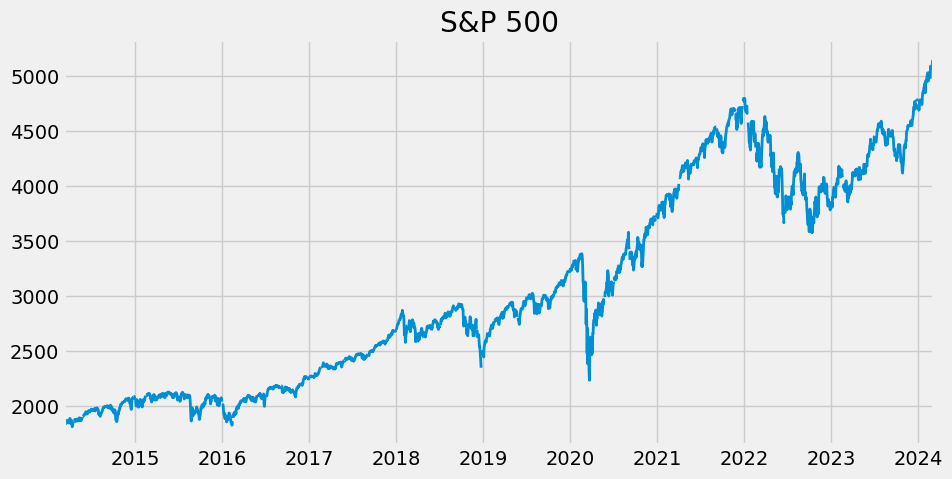

In [24]:
sp500.plot(figsize = (10,5), title = "S&P 500", lw = 2)
plt.show()

### 4. Pull and Join Multiple Data Series

In [25]:
unemp_res = fred.search("unemployment")

In [26]:
unemp_res

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-03-11,2024-03-11,Unemployment Rate,1948-01-01,2024-02-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-03-08 08:03:02-06:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2024-03-11,2024-03-11,Unemployment Rate,1948-01-01,2024-02-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-03-08 08:02:05-06:00,58,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2024-03-11,2024-03-11,Unemployment Level,1948-01-01,2024-02-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2024-03-08 08:03:05-06:00,71,The series comes from the 'Current Population ...
NROU,NROU,2024-03-11,2024-03-11,Noncyclical Rate of Unemployment,1949-01-01,2034-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2024-02-08 14:46:04-06:00,69,"Starting with the July, 2021 report: An Update..."
CCSA,CCSA,2024-03-11,2024-03-11,Continued Claims (Insured Unemployment),1967-01-07,2024-02-24,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2024-03-07 07:33:04-06:00,74,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LAUMT134234000000003A,LAUMT134234000000003A,2024-03-11,2024-03-11,"Unemployment Rate in Savannah, GA (MSA)",1990-01-01,2022-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2023-05-03 10:36:28-05:00,2,None
LRHUTTTTUSQ156S,LRHUTTTTUSQ156S,2024-03-11,2024-03-11,Harmonized Unemployment: Monthly Rates: Total:...,1960-01-01,2023-10-01,Quarterly,Q,Percent,%,Seasonally Adjusted,SA,2024-01-12 14:02:41-06:00,2,OECD Descriptor ID: LRHUTTTT OECD unit ID: PC ...
SAND706UR,SAND706UR,2024-03-11,2024-03-11,"Unemployment Rate in San Diego-Carlsbad, CA (MSA)",1990-01-01,2023-12-01,Monthly,M,Percent,%,Smoothed Seasonally Adjusted,SSA,2024-02-06 13:32:06-06:00,2,None


In [27]:
unrate = fred.get_series("UNRATE")

In [28]:
unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2023-10-01    3.8
2023-11-01    3.7
2023-12-01    3.7
2024-01-01    3.7
2024-02-01    3.9
Length: 914, dtype: float64

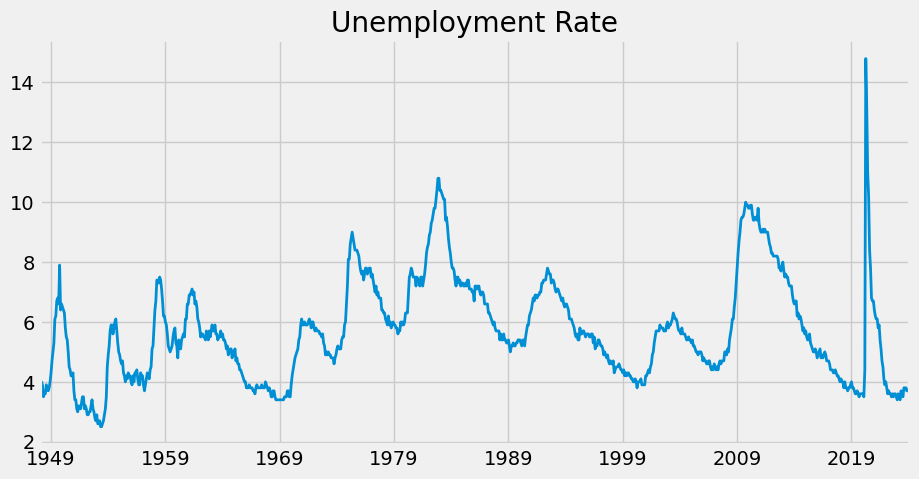

In [31]:
unrate.plot(figsize = (10,5), title = "Unemployment Rate", lw = 2)
plt.show()

In [52]:
unemp_df = fred.search("unemployment rate state", filter = ("frequency", "Monthly"))
unemp_df = unemp_df.query("seasonal_adjustment == 'Seasonally Adjusted' and units == 'Percent'")
unemp_df = unemp_df.loc[unemp_df["title"].str.contains("Unemployment Rate")]

In [65]:
all_res = []

for myid in unemp_df.index:
    res = fred.get_series(myid)
    res = res.to_frame(name = myid)
    all_res.append(res)

unemp_res = pd.concat(all_res, axis = 1).drop(["M08311USM156SNBR"], axis = 1)

In [66]:
unemp_res

,UNRATE,LNS14000006,CAUR,TXUR,M0892AUSM156SNBR,LNS14000024,LNS14000031,M0892BUSM156SNBR,NYUR,U2RATE,...,LNS14000061,CNERUR,LRUNTTTTUSM156S,CWSTUR,CNEWUR,LNS14000026,LNS14000048,LNS14000089,LNS14000150,LRUN25TTUSM156S
1929-04-01,NaN,NaN,NaN,NaN,0.69,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-05-01,NaN,NaN,NaN,NaN,1.65,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-06-01,NaN,NaN,NaN,NaN,2.06,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-07-01,NaN,NaN,NaN,NaN,0.79,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1929-08-01,NaN,NaN,NaN,NaN,0.04,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-01,3.8,5.8,4.8,4.1,NaN,3.5,5.3,NaN,4.2,1.9,...,3.4,3.7,3.8,4.2,2.8,3.2,3.1,4.2,2.0,3.2
2023-11-01,3.7,5.8,4.9,4.1,NaN,3.4,6.3,NaN,4.3,1.8,...,3.4,3.8,3.7,4.3,2.9,3.1,3.1,3.9,2.0,3.1
2023-12-01,3.7,5.2,5.1,4.0,NaN,3.4,4.6,NaN,4.5,1.8,...,3.5,3.9,3.7,4.5,3.1,3.3,3.2,4.2,2.1,3.3
2024-01-01,3.7,5.3,NaN,NaN,NaN,3.4,5.3,NaN,NaN,1.8,...,3.4,NaN,NaN,NaN,NaN,3.2,3.2,3.9,2.1,NaN
